# Walmart Case study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv('walmart_data.csv')

In [3]:
dfs=df.copy()

In [4]:
dfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [41]:
dfs.shape

(547391, 10)

In [5]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
dfs[['User_ID','Product_ID']].value_counts()

User_ID  Product_ID
1000001  P00000142     1
1004007  P00105342     1
         P00115942     1
         P00115142     1
         P00114942     1
                      ..
1001973  P00265242     1
         P00226342     1
         P00198042     1
         P00129842     1
1006040  P00349442     1
Name: count, Length: 550068, dtype: int64

In [7]:
dfs['User_ID'].nunique()

5891

In [8]:
dfs['Product_ID'].nunique()

3631

In [9]:
dfs['Product_Category'].nunique()

20

In [10]:
dfs['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [11]:
dfs['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [12]:
dfs.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


## Outlier Detection/Treatment And Non Visual Analysis

In [13]:
lst=[]
describe=dfs.describe()#Overall Stats
IQR=describe.loc[['25%','75%']]
description = IQR['Purchase']
Q1 = description['25%']
Q3 = description['75%']
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
lst.append(lower_bound)
lst.append(upper_bound)
lst

[-3523.5, 21400.5]

In [14]:
drop_index=dfs[(dfs['Purchase']<lst[0] )| (dfs['Purchase']>lst[1])].index
dfs.drop(drop_index,inplace=True)
print(f"The number of ouliers in the dataset for Purchase are :{len(drop_index)}")

The number of ouliers in the dataset for Purchase are :2677


In [15]:
len(dfs),len(df)

(547391, 550068)

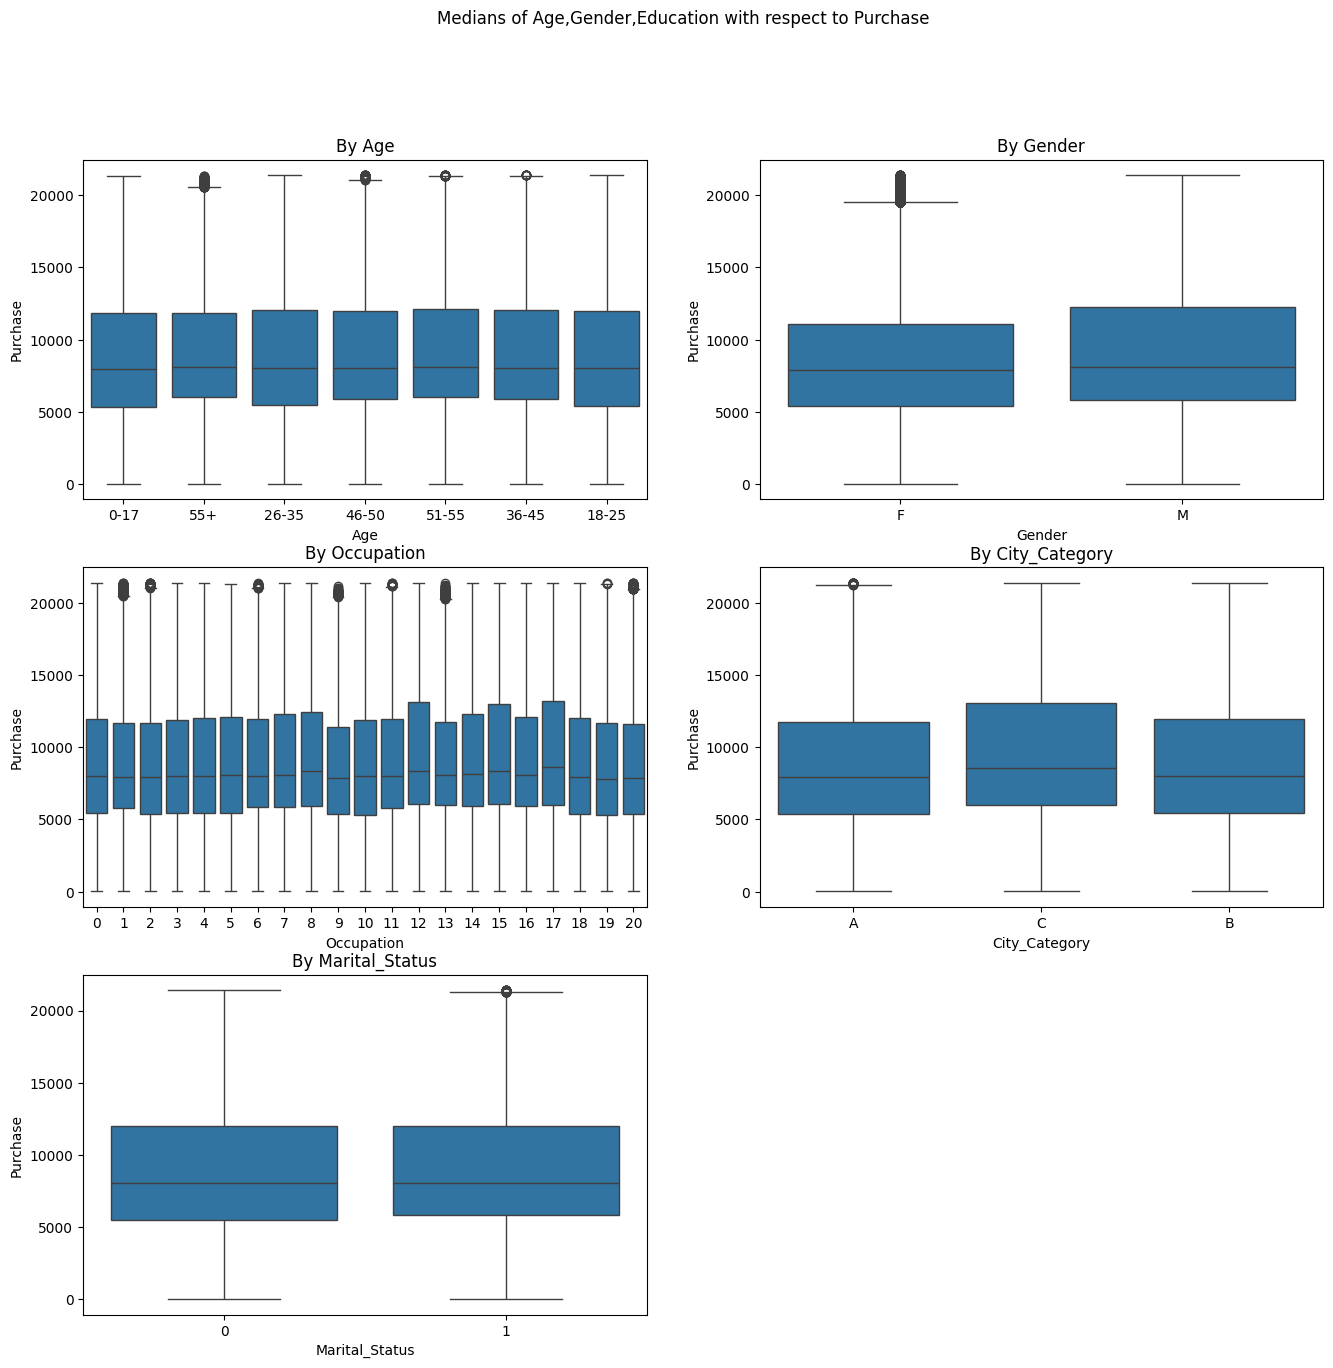

In [16]:
fig=plt.figure(figsize=(16,15))
plt.subplot(3,2,1)
sns.boxplot(y='Purchase',x='Age',data=dfs)
plt.title('By Age')
plt.subplot(3,2,2)
sns.boxplot(y='Purchase',x='Gender',data=dfs)
plt.title('By Gender')
plt.subplot(3,2,3)
sns.boxplot(y='Purchase',x='Occupation',data=dfs)
plt.title('By Occupation')
plt.subplot(3,2,4)
sns.boxplot(y='Purchase',x='City_Category',data=dfs)
plt.title('By City_Category')
plt.subplot(3,2,5)
sns.boxplot(y='Purchase',x='Marital_Status',data=dfs)
plt.title('By Marital_Status')
fig.suptitle('Medians of Age,Gender,Education with respect to Purchase')
plt.show()


We can still see some ouliers w.r.t to other columns but we have tried the outliers on Purchase column as a whole we can treat the individual category if we find it necessary.

In [17]:
dfs.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.473910e+05,547391.000000,547391.000000,547391.000000,547391.000000
mean,1.003028e+06,8.074627,0.409486,5.378945,9195.627195
std,1.727357e+03,6.521586,0.491739,3.927383,4938.872953
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5721.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,8038.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12019.000000
max,1.006040e+06,20.000000,1.000000,20.000000,21399.000000


# **Non Visual Analysis**.

In [18]:
dfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [19]:
df_Gender=dfs.groupby('Gender')['User_ID'].nunique().reset_index()
df_Gender

,Gender,User_ID
0,F,1666
1,M,4225


In [20]:
Male=float((df_Gender[df_Gender['Gender']=='M']['User_ID']/df['User_ID'].nunique()).iloc[0])
Female=float((df_Gender[df_Gender['Gender']=='F']['User_ID']/df['User_ID'].nunique()).iloc[0])
print(f"Percentage of Male and Female in the dataset are : {np.round((Male)*100,3)}% and {np.round((Female)*100,3)}%")

Percentage of Male and Female in the dataset are : 71.72% and 28.28%


In [21]:
df_Marital_Status=dfs.groupby('Marital_Status')['User_ID'].nunique().reset_index()
df_Marital_Status

,Marital_Status,User_ID
0,0,3417
1,1,2474


In [22]:
Single=float((df_Marital_Status[df_Marital_Status['Marital_Status']==0]['User_ID']/df['User_ID'].nunique()).iloc[0])
Married=float((df_Marital_Status[df_Marital_Status['Marital_Status']==1]['User_ID']/df['User_ID'].nunique()).iloc[0])
print(f"Percentage of Single and Married in the dataset are : {np.round((Single)*100,3)}% and {np.round((Married)*100,3)}%")

Percentage of Single and Married in the dataset are : 58.004% and 41.996%


Calculate mean of purchases of Male and Female

In [23]:
dfs_group=dfs.groupby('Gender')['Purchase'].mean().reset_index()
print(f"The mean purchase value of Male and Female is: {np.round(dfs_group['Purchase'].loc[1],2)},{np.round(dfs_group['Purchase'].loc[0],2)}")

The mean purchase value of Male and Female is: 9367.72,8671.05


Percentage of people living in a city_category

In [24]:
dfs_city=dfs.groupby('City_Category')['User_ID'].nunique().reset_index()
dfs_city

,City_Category,User_ID
0,A,1045
1,B,1707
2,C,3139


In [25]:
city_A=float((dfs_city[dfs_city['City_Category']=='A']['User_ID']/df['User_ID'].nunique()).iloc[0])
city_B=float((dfs_city[dfs_city['City_Category']=='B']['User_ID']/df['User_ID'].nunique()).iloc[0])
city_C=float((dfs_city[dfs_city['City_Category']=='C']['User_ID']/df['User_ID'].nunique()).iloc[0])
print(f"Percentage of people living in City_Category A,B,C: {np.round((city_A)*100,3)}%,{np.round((city_B)*100,3)}%,{np.round((city_C)*100,3)}%")

Percentage of people living in City_Category A,B,C: 17.739%,28.976%,53.285%


# Checking  if women are spending more than men

In [26]:
dfs_pp = dfs.groupby(['User_ID', 'Gender'])[['Purchase']].sum().reset_index()
dfs_pp


,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4069279
5887,1006037,F,1095824
5888,1006038,F,90034
5889,1006039,F,542672


In [27]:
male_avg = dfs_pp[dfs_pp['Gender']=='M']['Purchase'].mean()
female_avg = dfs_pp[dfs_pp['Gender']=='F']['Purchase'].mean()
print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 913870.84
Average amount spend by Female customers: 703781.06


Males spend more than women from the average values

## Visual Analysis

In [45]:
dfs_Age=dfs.groupby('Age')['User_ID'].nunique()
dfs_Occupation=dfs.groupby('Occupation')['User_ID'].nunique()
dfs_City_Category=dfs.groupby('City_Category')['User_ID'].nunique()
dfs_Marital_Status=dfs.groupby('Marital_Status')['User_ID'].nunique()
dfs_Product_Category=dfs.groupby('Product_Category')['User_ID'].nunique()
dfs_stay=dfs.groupby('Stay_In_Current_City_Years')['User_ID'].nunique()
dfs_Gender=dfs.groupby('Gender')['User_ID'].nunique()
dfs_Gender

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [29]:
dfs_stay

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64

In this section let us see some visual representation of the non visual analysis and some univarient and bivarient analysis

<ipython-input-133-34469ae21e99>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category',data=dfs,palette='viridis',ax=axs[2,0])


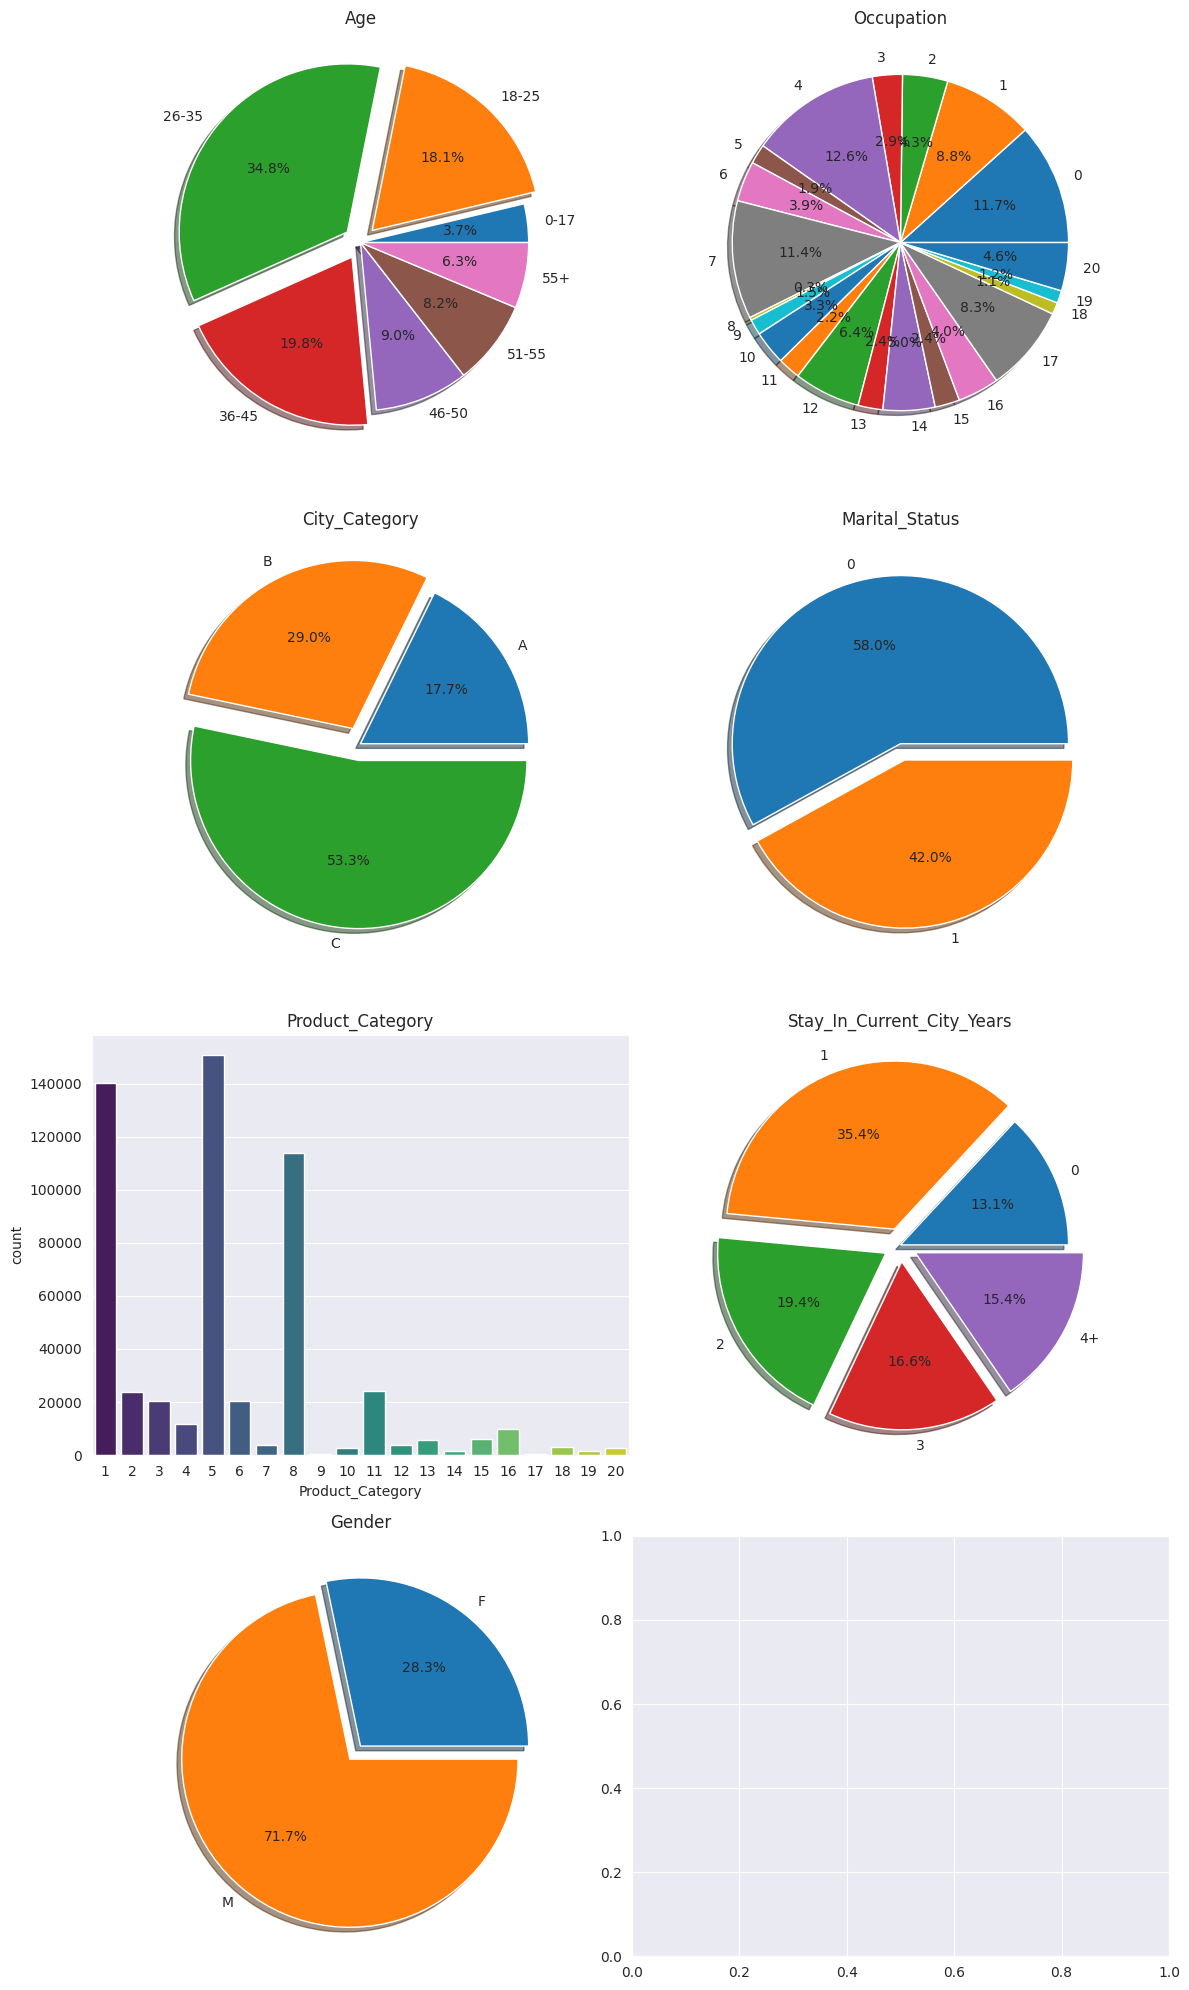

In [133]:
fig,axs=plt.subplots(4,2,figsize=(12,20))
explode_age=(0, 0.1, 0.1, 0.1,0,0,0)
explode_city=(0, 0.1, 0.1)
explode_marital=(0,0.1)
explode_stay=(0,0.1,0.1,0.1,0.1)
explode_Gender=(0,0.1)
axs[0,0].pie(dfs_Age,labels=dfs_Age.index,autopct='%1.1f%%',explode=explode_age,shadow=True)
axs[0,0].set_title('Age')
axs[0,1].pie(dfs_Occupation,labels=dfs_Occupation.index,autopct='%1.1f%%',shadow=True)
axs[0,1].set_title('Occupation')
axs[1,0].pie(dfs_City_Category,labels=dfs_City_Category.index,autopct='%1.1f%%',explode=explode_city,shadow=True)
axs[1,0].set_title('City_Category')
axs[1,1].pie(dfs_Marital_Status,labels=dfs_Marital_Status.index,autopct='%1.1f%%',explode=explode_marital,shadow=True)
axs[1,1].set_title('Marital_Status')
sns.countplot(x='Product_Category',data=dfs,palette='viridis',ax=axs[2,0])
axs[2,0].set_title('Product_Category')
axs[2,1].pie(dfs_stay,labels=dfs_stay.index,autopct='%1.1f%%',explode=explode_stay,shadow=True)
axs[2,1].set_title('Stay_In_Current_City_Years')
axs[3,0].pie(dfs_Gender,labels=dfs_Gender.index,autopct='%1.1f%%',explode=explode_Gender,shadow=True)
axs[3,0].set_title('Gender')
plt.tight_layout()
plt.show()

Some of the key Notes form the above graphs are:

1. 72.7% of the total users fall under the age group of 18-45 where 26-35 age group contributing the highest to thid ratio with 34.8%
2. 0.7,4 Occupation category cusotmers contribute to 35.7% of user base.
3. City_Category has highest user base at 53.3%
4. Singles form most of the userbase overall standing at 58%
5. Product Category 5 is the most bought category of all.
6. 35.4% of userbase doesn't live more than 1 yeat in a city and only 15.4% live more than 4 years






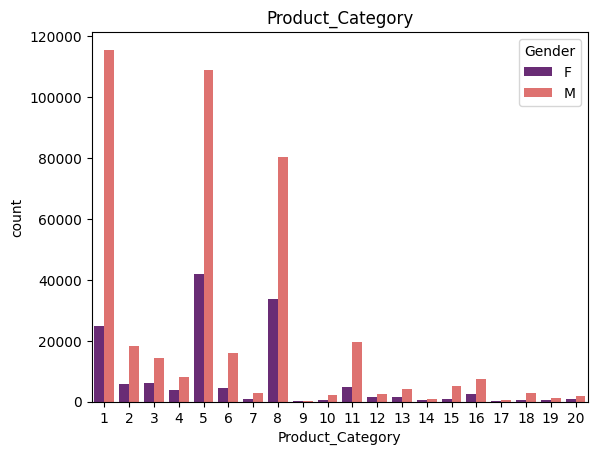

In [130]:
sns.countplot(x='Product_Category',hue='Gender',data=dfs,palette='magma')
plt.title('Product_Category')
plt.show()

Prodcut Category 1 is most bought by Males and 5 is most bought by Females

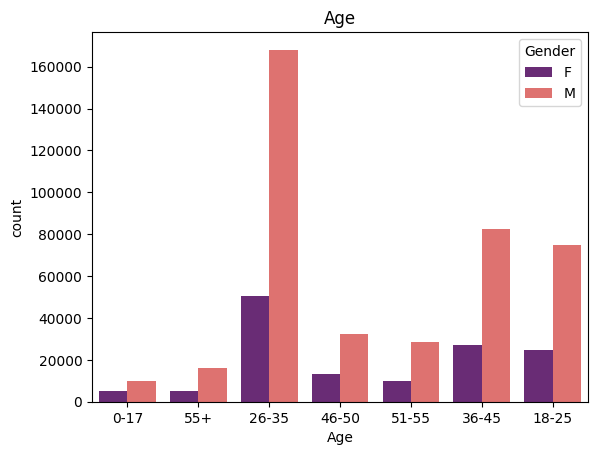

In [132]:
sns.countplot(x='Age',hue='Gender',data=dfs,palette='magma')
plt.title('Age')
plt.show()


For both Males and Females customer fall under 26-35 age group the highest

In [22]:
def counts(x):
  return x.count()
dfs_top_10=dfs.groupby('Product_Category')['Purchase'].agg([counts,sum]).sort_values(by='sum',ascending=False).head(10).reset_index()
dfs_top_10

,Product_Category,counts,sum
0,1,140378,1910013754
1,5,150933,941835229
2,8,113925,854318799
3,6,20466,324150302
4,2,23864,268516186
5,3,20213,204084713
6,16,9828,145120612
7,11,24287,113791115
8,15,5963,85941762
9,7,3721,60896731


<ipython-input-126-7e16acab476a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfs, y='Purchase', x=columns[count], ax=axs[row, col],notch=True,palette='Set2')
<ipython-input-126-7e16acab476a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfs, y='Purchase', x=columns[count], ax=axs[row, col],notch=True,palette='Set2')
<ipython-input-126-7e16acab476a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfs, y='Purchase', x=columns[count], ax=axs[row, col],notch=True,palette='Set2')
<ipython-input-126-7e16acab476a>:9: FutureW

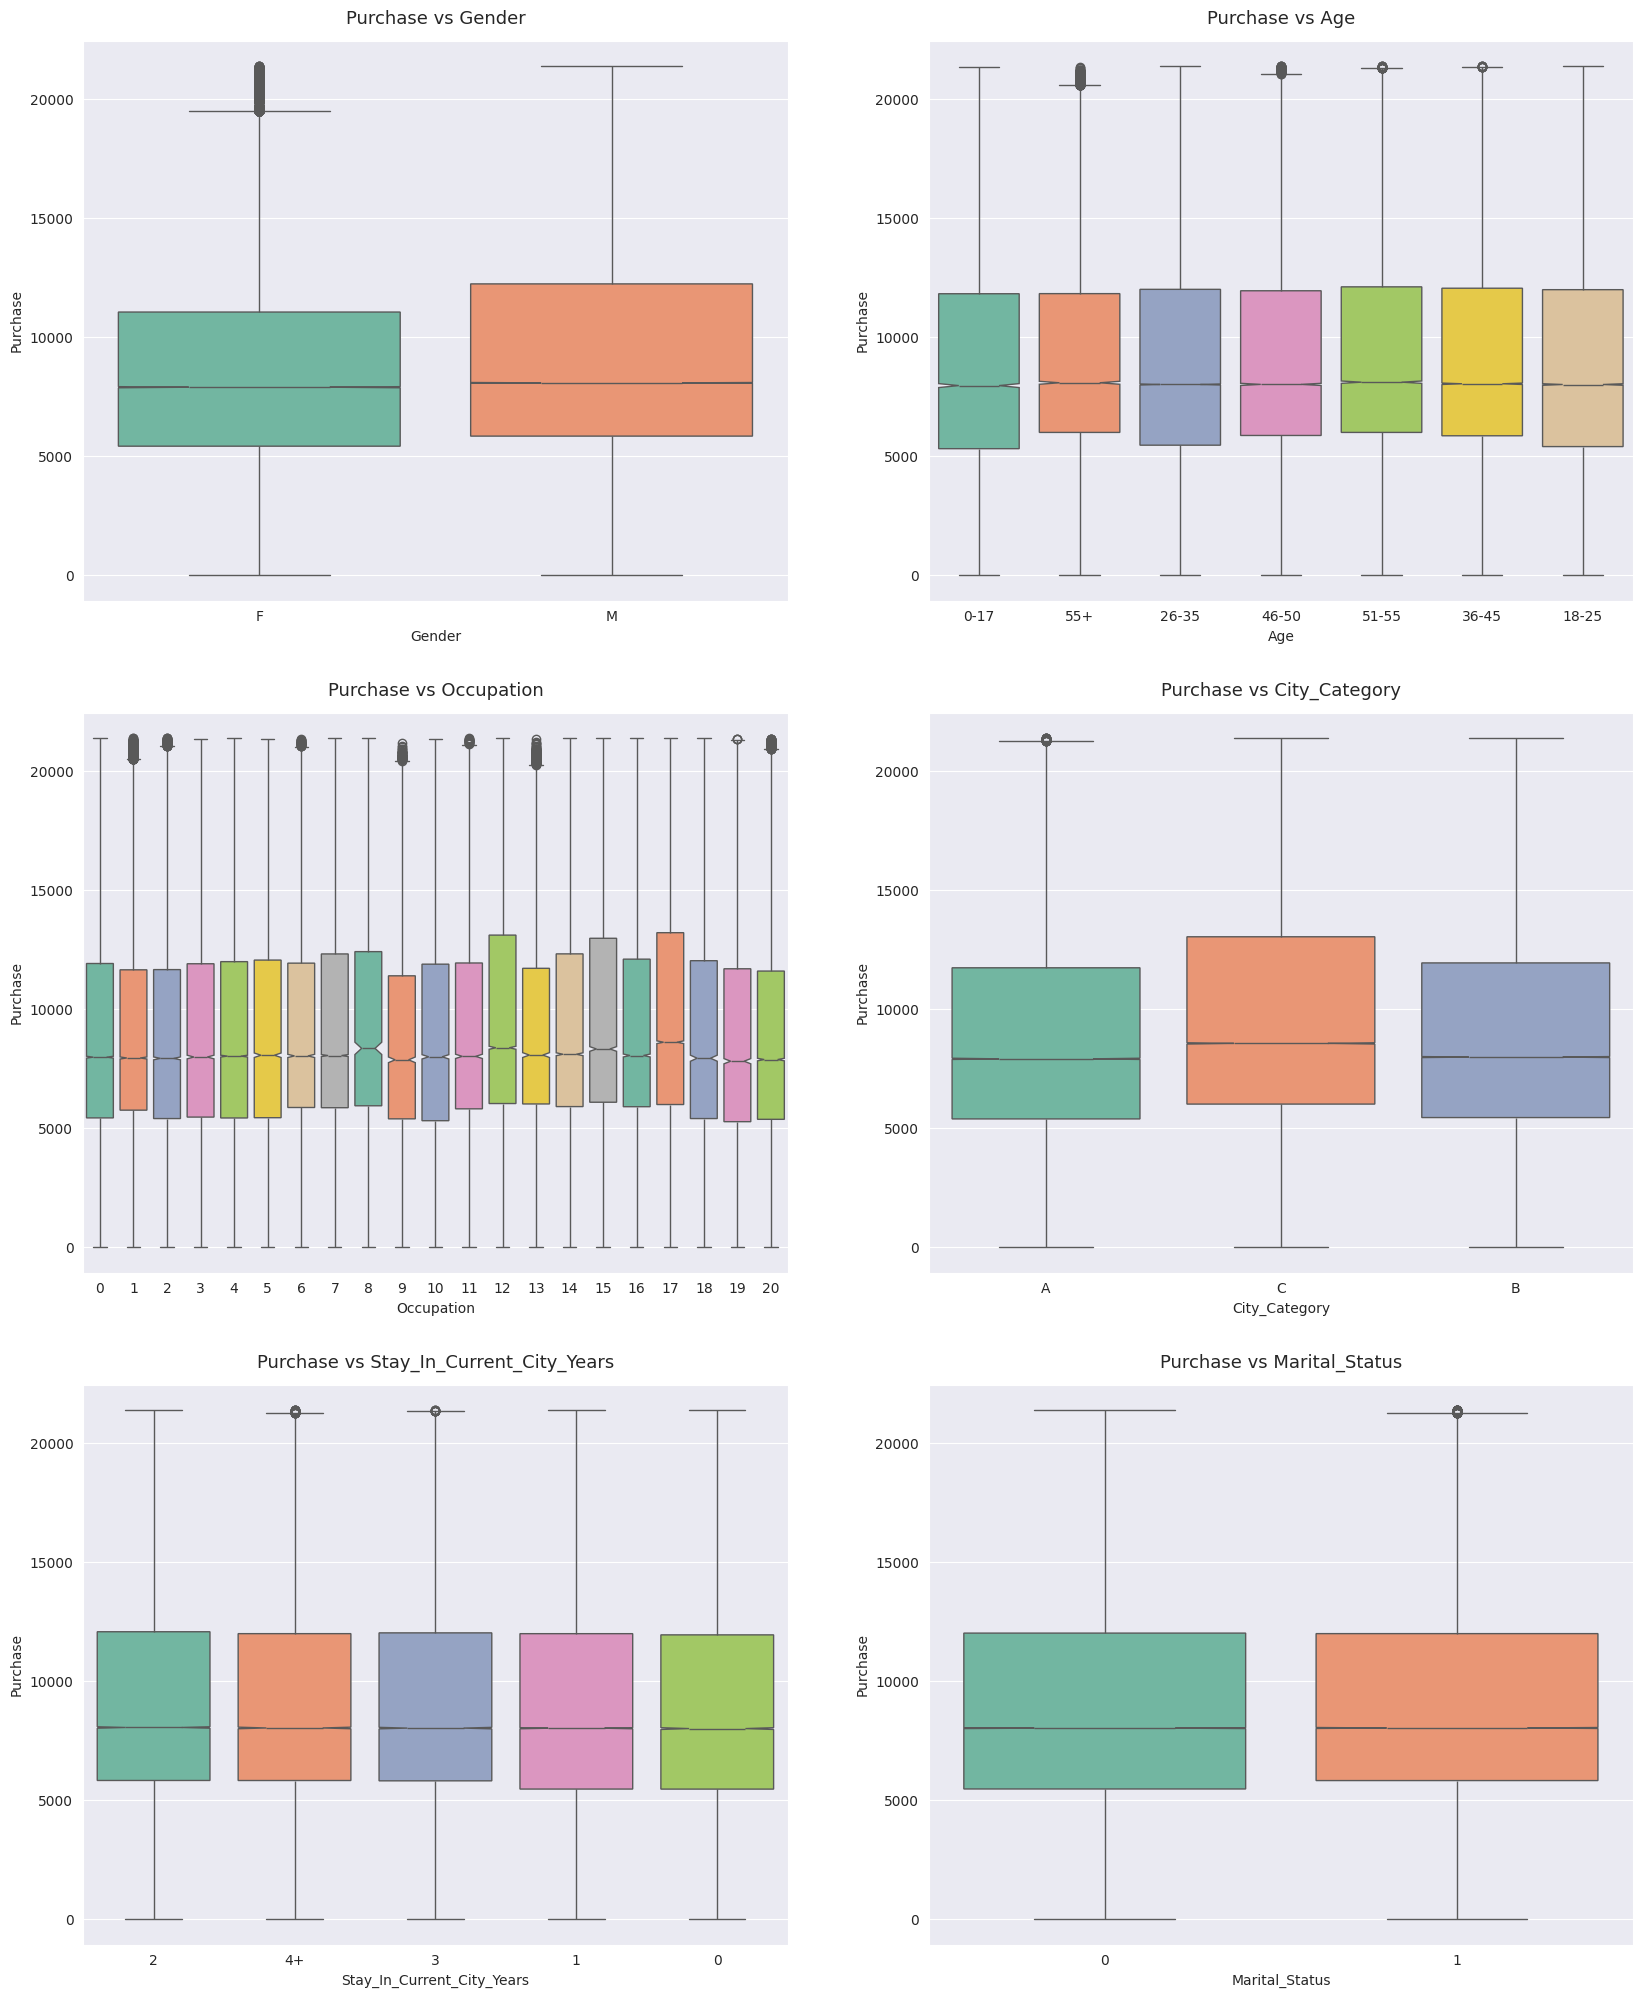

<ipython-input-126-7e16acab476a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfs, y='Purchase', x=columns[-1], palette='Set3')


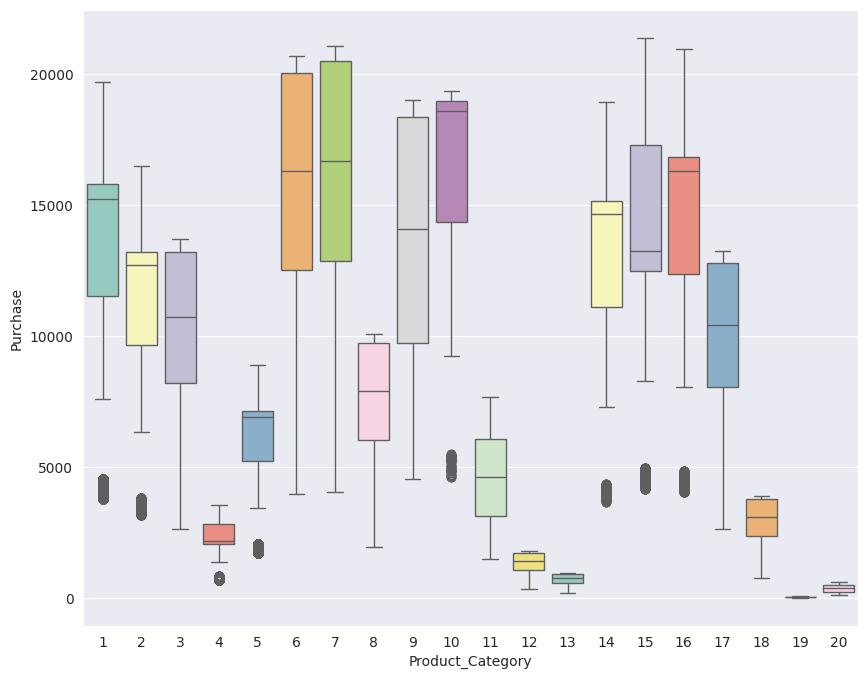

In [126]:
columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("darkgrid")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=dfs, y='Purchase', x=columns[count], ax=axs[row, col],notch=True,palette='Set2')
        axs[row,col].set_title(f"Purchase vs {columns[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=dfs, y='Purchase', x=columns[-1], palette='Set3')
plt.show()

**Observations**

1) From the about graphs it is evedent that the medain purchases of age,Marital status and occupation categories are almost same.

2) But the medians for Gender and city_categories are slighly highter for male sin gender and city category 'C' with also some small change in the min and max values.


Text(0.5, 1.0, 'Product_Category vs City_Category ')

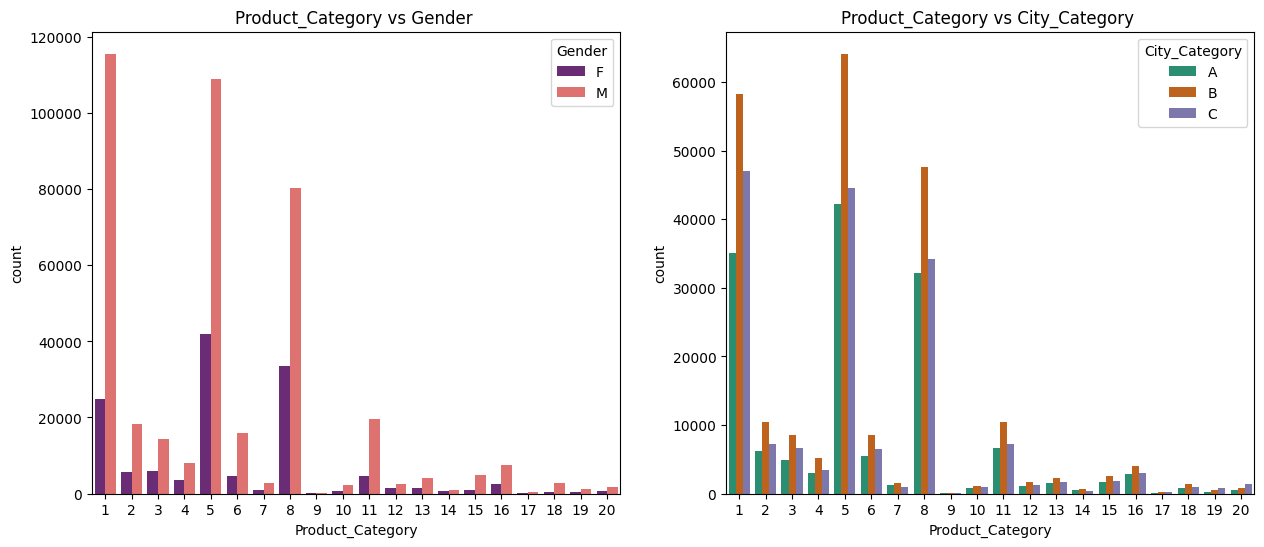

In [125]:
fig,axs=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='Product_Category',hue='Gender',data=dfs,palette='magma',ax=axs[0])
axs[0].set_title('Product_Category vs Gender ')
sns.countplot(x='Product_Category',hue='City_Category',data=dfs,palette='Dark2',ax=axs[1])
axs[1].set_title('Product_Category vs City_Category ')

**Product categories 1,5,8 are hero categories accross cities and Gender**

# Multivarient Analysis

Text(0.5, 1.0, 'Marital_Status vs Gender vs Purchase')

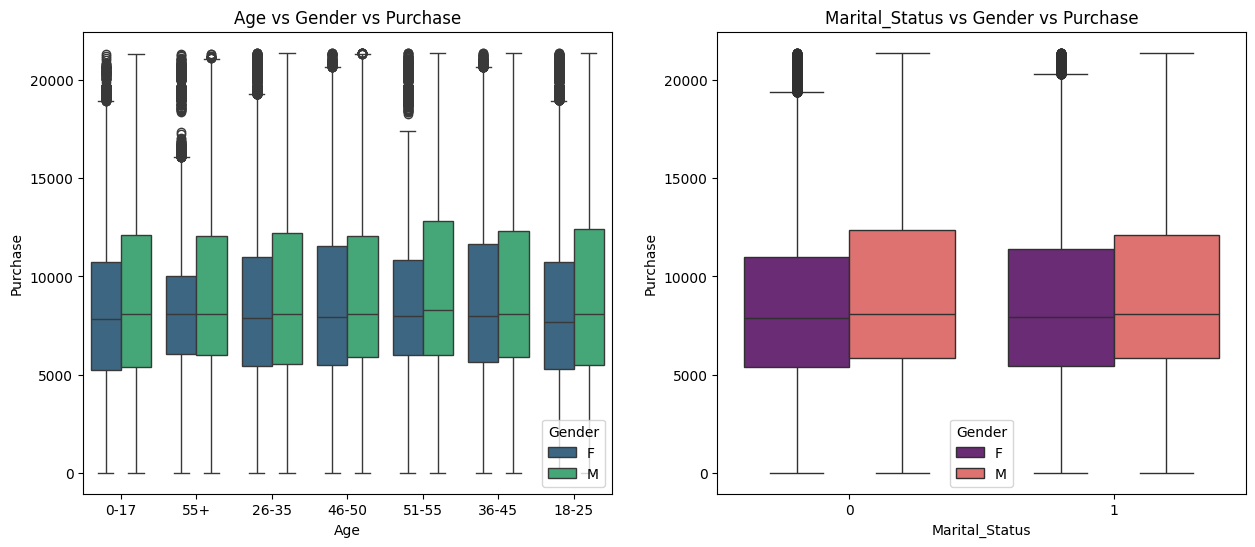

In [107]:

fig,axs=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x='Age',y='Purchase',hue='Gender',data=dfs,palette='viridis',ax=axs[0])
axs[0].set_title('Age vs Gender vs Purchase')
sns.boxplot(x='Marital_Status',y='Purchase',hue='Gender',data=dfs,palette='magma',ax=axs[1])
axs[1].set_title('Marital_Status vs Gender vs Purchase')


Single Males have a slighly higher median and min,max values than rest of the categories.Medians of all age categories looks almost same even when separated by gender

In [114]:
dfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Let Us plot the sum of purchase for male and female as history and see what can we observe

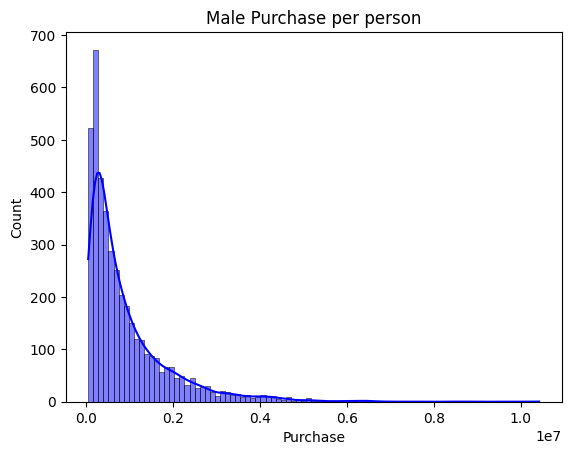

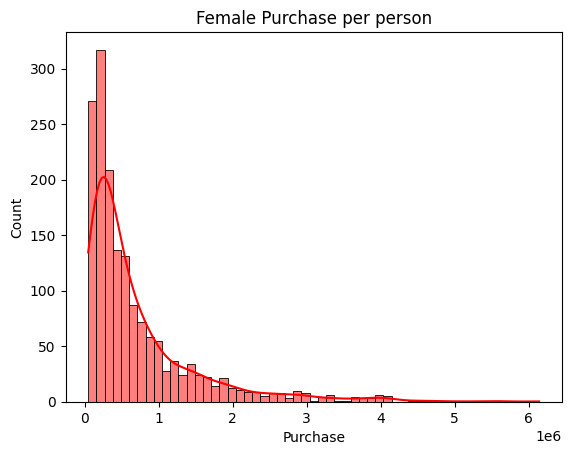

In [32]:
male_pp=dfs_pp[dfs_pp['Gender']=='M']['Purchase']
sns.histplot(male_pp,kde=True,color='blue')
plt.title('Male Purchase per person')
plt.show()

female_pp=dfs_pp[dfs_pp['Gender']=='F']['Purchase']
sns.histplot(female_pp,kde=True,color='red')
plt.title('Female Purchase per person')
plt.show()

**This resembles log normal distribution let us check if distrbution of sample means will follow normal distribution or not further
and calculating Confidence interval for purchases w.r.t Gender.**

In [33]:
df_male = dfs_pp[dfs_pp['Gender']=='M']
df_female = dfs_pp[dfs_pp['Gender']=='F']

In [81]:
male_sample_size = 3000
female_sample_size = 2500
count = 2000
male_means = []
female_means = []
for _ in range(count):
    male_mean = df_male.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = df_female.sample(female_sample_size, replace=True)['Purchase'].mean()
    male_means.append(male_mean)
    female_means.append(female_mean)

Text(0.5, 1.0, 'Female_means')

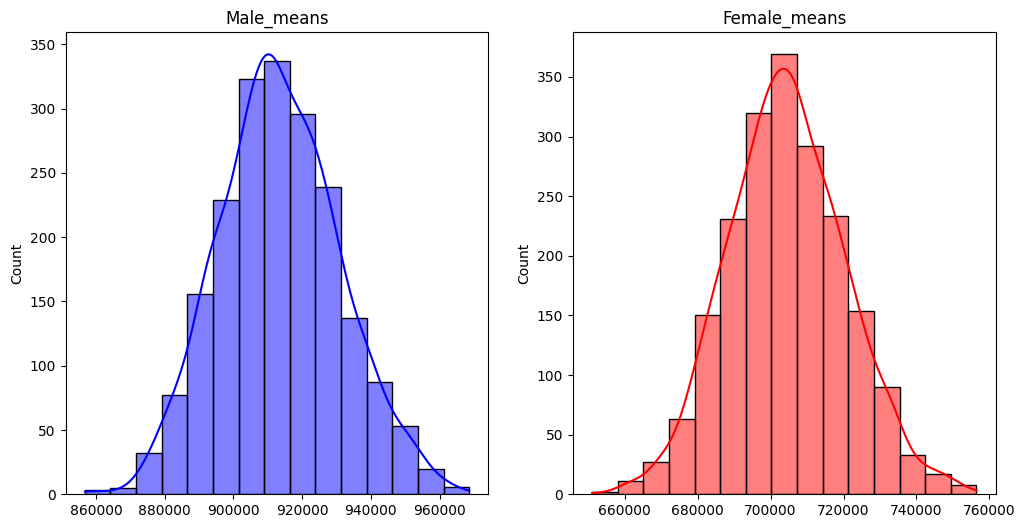

In [82]:
fig,axis=plt.subplots(1,2,figsize=(12,6))
sns.histplot(male_means,kde=True,ax=axis[0],bins=15,color='blue')
axis[0].set_title('Male_means')
sns.histplot(female_means,kde=True,ax=axis[1],bins=15,color='red')
axis[1].set_title('Female_means')




**We can conclude that sample means of purchase follow normal distribution**

In [110]:
from scipy.stats import norm
sd_male=df_male['Purchase'].std()
sd_female=df_female['Purchase'].std()
male_mean=df_male['Purchase'].mean()
female_mean=df_female['Purchase'].mean()
ci_male= norm.interval(0.95,loc=male_mean,scale=sd_male/np.sqrt(male_sample_size))
ci_female= norm.interval(0.95,loc=female_mean,scale=sd_female/np.sqrt(female_sample_size))
print(f"confidence interval for male means is : {np.round(ci_male,2)} and female means is {np.round(ci_female,2)} ")

confidence interval for male means is : [878922.69 948818.99] and female means is [672424.09 735138.04] 


# **CI w.r.t Marital Status**


In [48]:
dfs_ms = dfs.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum().reset_index()
dfs_ms

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4069279
5887,1006037,0,1095824
5888,1006038,0,90034
5889,1006039,1,542672


In [69]:
df_single = dfs_ms[dfs_ms['Marital_Status']==0]
df_Married = dfs_ms[dfs_ms['Marital_Status']==1]
df_Married.head()

,User_ID,Marital_Status,Purchase
3,1000004,1,206468
4,1000005,1,821001
6,1000007,1,234668
7,1000008,1,796593
9,1000010,1,2169510


In [78]:
single_sample_size = 3000
Married_sample_size = 2500
count = 2000
single_means = []
Married_means = []
for _ in range(count):
    single_mean = df_single.sample(single_sample_size, replace=True)['Purchase'].mean()
    Married_mean = df_Married.sample(Married_sample_size, replace=True)['Purchase'].mean()
    single_means.append(single_mean)
    Married_means.append(Married_mean)


Text(0.5, 1.0, 'Married_means')

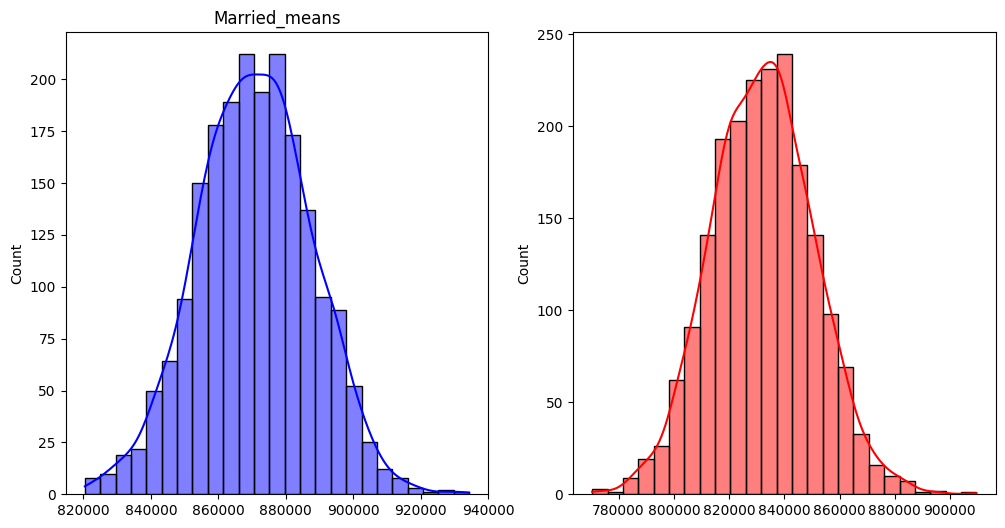

In [79]:
fig,axis=plt.subplots(1,2,figsize=(12,6))
sns.histplot(single_means,kde=True,ax=axis[0],bins=25,color='blue')
axis[0].set_title('single_means')
sns.histplot(Married_means,kde=True,ax=axis[1],bins=25,color='red')
axis[0].set_title('Married_means')

The Varaibles follow Normal Distribution

In [111]:
sd_single=df_single['Purchase'].std()
sd_Married=df_Married['Purchase'].std()
single_mean1=df_single['Purchase'].mean()
Married_mean1=df_Married['Purchase'].mean()
ci_single= norm.interval(0.95,loc=single_mean1,scale=sd_single/np.sqrt(single_sample_size))
ci_Married= norm.interval(0.95,loc=Married_mean1,scale=sd_Married/np.sqrt(Married_sample_size))
print(f"confidence intervals for Singles : {np.round(ci_single,2)} and Married :{np.round(ci_Married,2)} ")

confidence intervals for Singles : [836809.24 904096.66] and Married :[796022.09 868703.73] 


# Confidence interval w.r.t Ages

In [92]:
dfs_ag = dfs.groupby(['User_ID', 'Age'])[['Purchase']].sum().reset_index()
df_0_17 = dfs_ag[dfs_ag['Age']=='0-17']
df_18_25 = dfs_ag[dfs_ag['Age']=='18-25']
df_26_35= dfs_ag[dfs_ag['Age']=='26-35']
df_36_45= dfs_ag[dfs_ag['Age']=='36-45']
df_46_50= dfs_ag[dfs_ag['Age']=='46-50']
df_51_55= dfs_ag[dfs_ag['Age']=='51-55']
df_55_plus= dfs_ag[dfs_ag['Age']=='55+']


In [94]:
sample_0_17 = 3000
sample_18_25 = 3000
sample_26_35 = 3000
sample_36_45 = 3000
sample_46_50 = 3000
sample_51_55 = 3000
sample_55_plus = 3000
count = 2000
means_0_17 = []
means_18_25 = []
means_26_35 = []
means_36_45 = []
means_46_50 = []
means_51_55 = []
means_55_plus = []
for _ in range(count):
    mean_0_17 = df_0_17.sample(sample_0_17, replace=True)['Purchase'].mean()
    mean_18_25=df_18_25.sample(sample_18_25, replace=True)['Purchase'].mean()
    mean_26_35=df_26_35.sample(sample_26_35, replace=True)['Purchase'].mean()
    mean_36_45=df_36_45.sample(sample_36_45, replace=True)['Purchase'].mean()
    mean_46_50=df_46_50.sample(sample_46_50, replace=True)['Purchase'].mean()
    mean_51_55=df_51_55.sample(sample_51_55, replace=True)['Purchase'].mean()
    mean_55_plus=df_55_plus.sample(sample_55_plus, replace=True)['Purchase'].mean()
    means_0_17.append(mean_0_17)
    means_18_25.append(mean_18_25)
    means_26_35.append(mean_26_35)
    means_36_45.append(mean_36_45)
    means_46_50.append(mean_46_50)
    means_51_55.append(mean_51_55)
    means_55_plus.append(mean_55_plus)



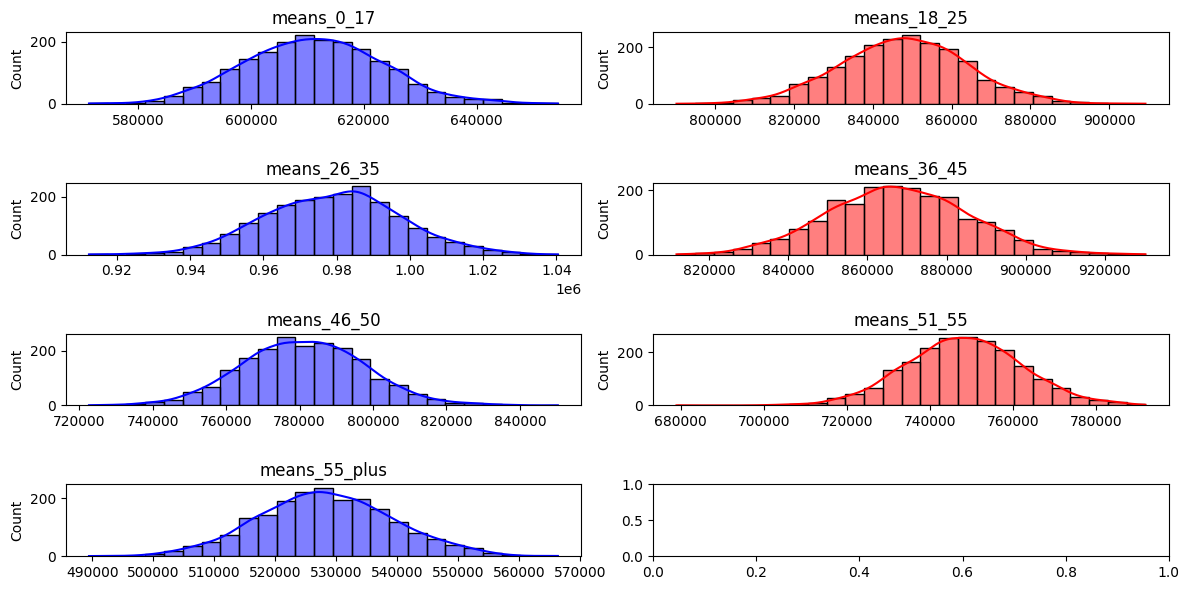

In [98]:
fig,axis=plt.subplots(4,2,figsize=(12,6))
sns.histplot(means_0_17,kde=True,ax=axis[0,0],bins=25,color='blue')
axis[0,0].set_title('means_0_17')
sns.histplot(means_18_25,kde=True,ax=axis[0,1],bins=25,color='red')
axis[0,1].set_title('means_18_25')
sns.histplot(means_26_35,kde=True,ax=axis[1,0],bins=25,color='blue')
axis[1,0].set_title('means_26_35')
sns.histplot(means_36_45,kde=True,ax=axis[1,1],bins=25,color='red')
axis[1,1].set_title('means_36_45')
sns.histplot(means_46_50,kde=True,ax=axis[2,0],bins=25,color='blue')
axis[2,0].set_title('means_46_50')
sns.histplot(means_51_55,kde=True,ax=axis[2,1],bins=25,color='red')
axis[2,1].set_title('means_51_55')
sns.histplot(means_55_plus,kde=True,ax=axis[3,0],bins=25,color='blue')
axis[3,0].set_title('means_55_plus')
plt.tight_layout()

All the variables are again follow normal distubution so we can use CLT

In [113]:
sd_0_17=df_0_17['Purchase'].std()
sd_18_25=df_18_25['Purchase'].std()
sd_26_35=df_26_35['Purchase'].std()
sd_36_45=df_36_45['Purchase'].std()
sd_46_50=df_46_50['Purchase'].std()
sd_51_55=df_51_55['Purchase'].std()
sd_55_plus=df_55_plus['Purchase'].std()
mn_0_17=df_0_17['Purchase'].mean()
mn_18_25=df_18_25['Purchase'].mean()
mn_26_35=df_26_35['Purchase'].mean()
mn_36_45=df_36_45['Purchase'].mean()
mn_46_50=df_46_50['Purchase'].mean()
mn_51_55=df_51_55['Purchase'].mean()
mn_55_plus=df_55_plus['Purchase'].mean()

ci_0_17= norm.interval(0.95,loc=mn_0_17,scale=sd_0_17/np.sqrt(sample_0_17))
ci_18_25= norm.interval(0.95,loc=mn_18_25,scale=sd_18_25/np.sqrt(sample_18_25))
ci_26_35= norm.interval(0.95,loc=mn_26_35,scale=sd_26_35/np.sqrt(sample_26_35))
ci_36_45= norm.interval(0.95,loc=mn_36_45,scale=sd_36_45/np.sqrt(sample_36_45))
ci_46_50= norm.interval(0.95,loc=mn_46_50,scale=sd_46_50/np.sqrt(sample_46_50))
ci_51_55= norm.interval(0.95,loc=mn_51_55,scale=sd_51_55/np.sqrt(sample_51_55))
ci_55_plus= norm.interval(0.95,loc=mn_55_plus,scale=sd_55_plus/np.sqrt(sample_55_plus))
print(f"confidence intervals for 0-17 : {np.round(ci_0_17,2)} and 18-25 :{np.round(ci_18_25,2)} ")
print(f"confidence intervals for 26-35 : {np.round(ci_26_35,2)} and 36-45 :{np.round(ci_36_45,2)} ")
print(f"confidence intervals for 46-50 : {np.round(ci_46_50,2)} and 51-55 :{np.round(ci_51_55,2)} ")
print(f"confidence intervals for 55+ : {np.round(ci_55_plus,2)} ")


confidence intervals for 0-17 : [587351.47 635542.7 ] and 18-25 :[816281.77 879371.3 ] 
confidence intervals for 26-35 : [ 942591.38 1015765.49] and 36-45 :[832774.16 902432.36] 
confidence intervals for 46-50 : [748332.29 814151.1 ] and 51-55 :[720316.63 776059.42] 
confidence intervals for 55+ : [506551.85 549993.4 ] 


# Observations


1) Males Dominate the customer base (71.72%) and they spend more with population average purchase amount of 9367.72

2) Singles form a marginally higher customer base(58%) and most of the customer base in the 'C' City_Category.

3) 72.7% of the total users fall under the age group of 18-45 where 26-35 age group contributing the highest to thid ratio with 34.8%.

4)0,7,4 Occupation category cusotmers contribute to 35.7% of user base.

5) City_Category has highest user base at 53.3%.

6) Singles form most of the userbase overall standing at 58%.

7) Product Category 5 is the most bought category of all.

8) 35.4% of userbase doesn't live more than 1 yeat in a city and only 15.4% live more than 4 years.

9) Cusotmer base  of Single Male individuals are spending more than rest of the categories.


# Observation on CLT

1)confidence interval for male means is : [878922.69 948818.99] and female means is [672424.09 735138.04]

2)Confidence intervals for Singles means is  : [836809.24 904096.66] and Married is  :[796022.09 868703.73]

3)confidence intervals for 0-17 : [587351.47 635542.7 ] and 18-25 :[816281.77 879371.3 ]

4)Confidence intervals for 26-35 : [ 942591.38 1015765.49] and 36-45 :[832774.16 902432.36]

5)Confidence intervals for 46-50 : [748332.29 814151.1 ] and 51-55 :[720316.63 776059.42]  and Confidence intervals for 55+ : [506551.85 549993.4 ]



 The varaibles Age vs Purchase,Gender vs Purchase, Marital_status vs Purchase all follow normal distribution and their Confidence Intervals also show that the population means of these fall in between the obtained CI, where we have already seen the population mean for male is 9367.72 where as CI for males was [878922.69 948818.99]


# Business Insights for Walmart

1) The main customer base follows a combination of people between an age group of 18-45,where the hero contributors are age group 26-35 coming from 'C' category cities.

2) The other two categories of cities combined form a less than 50% of customer base when compared to City 'C', so we need to focus more on marketing our hero product cateogory 5 across cities.

3) Occupation categories 0,7,4 are hero contributors accross,so there is a chance that these are high income and high value customers in the future and hense can focus more on related product categories.

4) Males dominate the customer base abruptly so need to focus more on the product categories other than 1,5,8 which popular amount both males and females.

5) Same goes with the cities too incase of business expansion, the same product categoreis 1,5,8 are dominant in 'C' city category so need to focus more on other product categories in order to acquire more customer from these low performing cities.